In [29]:
import numpy as np 
import pandas as pd 

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

tweets = pd.read_csv('C:/Users/Snehal/Downloads/train.csv')
test = pd.read_csv('C:/Users/Snehal/Downloads/test.csv')

#tweets = pd.read_csv(r'C:\Users\TeYan\OneDrive\Work\Kaggle\Tweets_Disaster\Data\train.csv')
#tweets = pd.read_csv('/Users/teyang/OneDrive/Work/Kaggle/Tweets_Disaster/Data/train.csv')

In [30]:
tweets.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


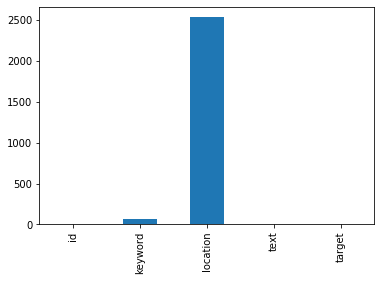

In [31]:
tweets.isnull().sum().plot(kind='bar')

Text(0, 0.5, 'Samples')

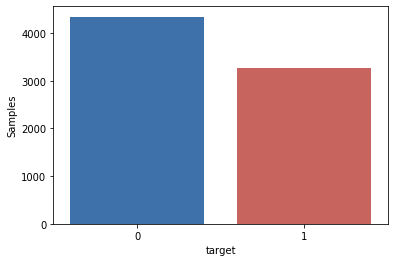

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

color = [sns.xkcd_rgb['medium blue'], sns.xkcd_rgb['pale red']]
sns.countplot('target',data = tweets, palette = color)
plt.gca().set_ylabel('Samples')

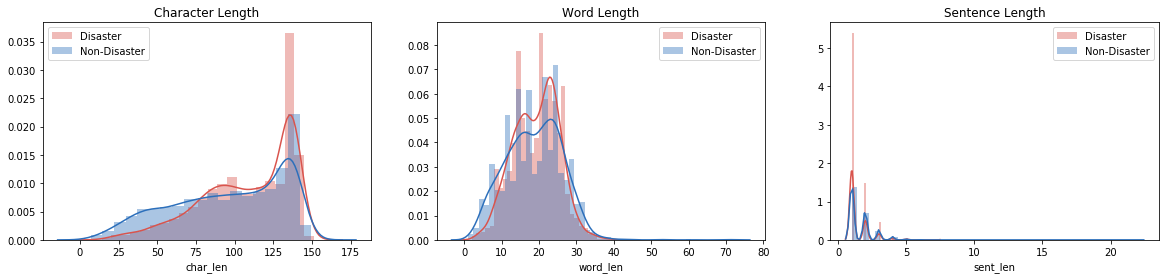

In [33]:
#import nltk
#nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# count number of characters in each tweet
tweets['char_len'] = tweets.text.str.len()

# count number of words in each tweet
word_tokens = [len(word_tokenize(tweet)) for tweet in tweets.text]
tweets['word_len'] = word_tokens

# count number of sentence in each tweet
sent_tokens = [len(sent_tokenize(tweet)) for tweet in tweets.text]
tweets['sent_len'] = sent_tokens

plot_cols = ['char_len','word_len','sent_len']
plot_titles = ['Character Length','Word Length','Sentence Length']

plt.figure(figsize=(20,4))
for counter, i in enumerate([0,1,2]):
    plt.subplot(1,3,counter+1)
    sns.distplot(tweets[tweets.target == 1][plot_cols[i]], label='Disaster', color=color[1]).set_title(plot_titles[i])
    sns.distplot(tweets[tweets.target == 0][plot_cols[i]], label='Non-Disaster', color=color[0])
    plt.legend()

In [34]:
# Investigate the Outliers

tweets[tweets.sent_len > 8]
tweets[tweets.word_len > 50]

,id,keyword,location,text,target,char_len,word_len,sent_len
362,520,army,Pakistan,.: .: .: .: .: .: .: .: .: .: .: .: .: .: .: ....,0,140,53,22
830,1207,blizzard,NaN,the best thing at DQ is the cotton candy blizz...,0,100,60,2
1270,1832,burned,NaN,when you're taking a shower and someone flushe...,0,157,72,2
4929,7023,mayhem,?? Made in the Philippines ??,_\n?????RETWEET\n???????\n?????FOLLOW ALL WHO ...,0,145,70,11
4949,7053,meltdown,? miranda ? 521 mi,@kinkyconnors IM sorry for my meltdown last ni...,0,127,52,2


Text(0.5, 1.0, 'Top Stopwords for  Disaster Tweets')

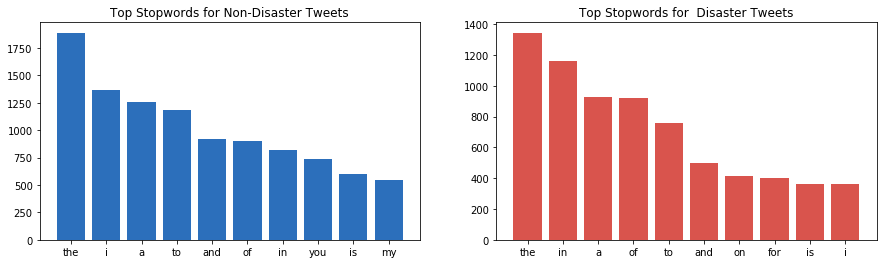

In [35]:
## Plot most common stopwords

#nltk.download('stopwords')

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# Get all the word tokens in dataframe for Disaster and Non-Disaster
corpus0 = [] # Non-Disaster
[corpus0.append(word.lower()) for tweet in tweets[tweets.target == 0].text for word in word_tokenize(tweet)]
corpus1 = [] # Disaster
[corpus1.append(word.lower()) for tweet in tweets[tweets.target == 1].text for word in word_tokenize(tweet)]

# Function for counting top stopwords in a corpus
def count_top_stopwords(corpus):
    stopwords_freq = {}
    for word in corpus:
        if word in stop: 
            if word in stopwords_freq:
                stopwords_freq[word] += 1
            else:
                stopwords_freq[word] = 1
    topwords = sorted(stopwords_freq.items(), key=lambda item: item[1], reverse=True)[:10] # get the top 10 stopwords
    x,y = zip(*topwords) # get key and values
    return x,y

x0,y0 = count_top_stopwords(corpus0)
x1,y1 = count_top_stopwords(corpus1)

# Plot bar plot of top stopwords for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Stopwords for Non-Disaster Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Stopwords for  Disaster Tweets')

Text(0.5, 1.0, 'Top Punctuations for Disaster Tweets')

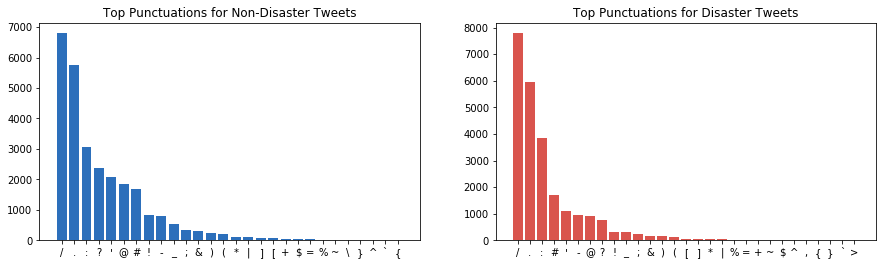

In [36]:
## Plot most common punctuations

from string import punctuation

# Get all the punctuations in dataframe for Disaster and Non-Disaster
corpus0 = [] # Non-Disaster
[corpus0.append(c) for tweet in tweets[tweets.target == 0].text for c in tweet]
corpus0 = list(filter(lambda x: x in punctuation, corpus0)) # use filter to select only punctuations
corpus1 = [] # Disaster
[corpus1.append(c) for tweet in tweets[tweets.target == 1].text for c in tweet]
corpus1 = list(filter(lambda x: x in punctuation, corpus1)) 

from collections import Counter
x0,y0 = zip(*Counter(corpus0).most_common())
x1,y1 = zip(*Counter(corpus1).most_common())

# Plot bar plot of top punctuations for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Punctuations for Non-Disaster Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Punctuations for Disaster Tweets')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

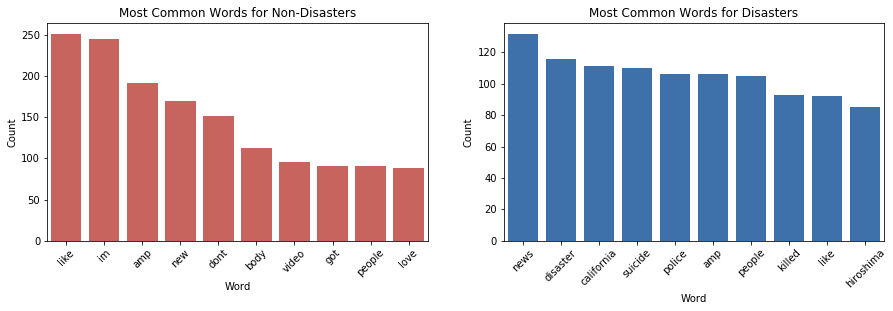

In [37]:
## Plot most common words
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop = ENGLISH_STOP_WORDS.union(stop) # combine stop words from different sources

# function for removing url from text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Get all the word tokens in dataframe for Disaster and Non-Disaster
# - remove url, tokenize tweet into words, lowercase words
corpus0 = [] # Non-Disaster
[corpus0.append(word.lower()) for tweet in tweets[tweets.target == 0].text for word in word_tokenize(remove_url(tweet))]
corpus0 = list(filter(lambda x: x not in stop, corpus0)) # use filter to unselect stopwords

corpus1 = [] # Disaster
[corpus1.append(word.lower()) for tweet in tweets[tweets.target == 1].text for word in word_tokenize(remove_url(tweet))]
corpus1 = list(filter(lambda x: x not in stop, corpus1)) # use filter to unselect stopwords

# Create df for word counts to use sns plots
a = Counter(corpus0).most_common()
df0 = pd.DataFrame(a, columns=['Word','Count'])

a = Counter(corpus1).most_common()
df1 = pd.DataFrame(a, columns=['Word','Count'])

# Plot for Disaster and Non-Disaster
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Word',y='Count',data=df0.head(10), color=color[1]).set_title('Most Common Words for Non-Disasters')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x='Word',y='Count',data=df1.head(10), color=color[0]).set_title('Most Common Words for Disasters')
plt.xticks(rotation=45)

In [38]:
## Replace NaNs with 'None'
tweets.keyword.fillna('None', inplace=True) 

#############################################################################################################################
## Expand Contractions

# Function for expanding most common contractions https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

tweets.text = [decontraction(tweet) for tweet in tweets.text]

#############################################################################################################################
## Remove Emojis

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

print(remove_emoji("OMG there is a volcano eruption!!! 😭😱😷"))

tweets.text = tweets.text.apply(lambda x: remove_emoji(x))

OMG there is a volcano eruption!!! 


In [39]:
#############################################################################################################################
## Remove URLs
tweets.text = tweets.text.apply(lambda x: remove_url(x))

#############################################################################################################################
## Remove Punctuations except '!?'

def remove_punct(text):
    new_punct = re.sub('\ |\!|\?', '', punctuation)
    table=str.maketrans('','',new_punct)
    return text.translate(table)

tweets.text = tweets.text.apply(lambda x: remove_punct(x))

#############################################################################################################################
## Replace amp
def replace_amp(text):
    text = re.sub(r" amp ", " and ", text)
    return text

tweets.text = tweets.text.apply(lambda x: replace_amp(x))

#############################################################################################################################

In [40]:
pip install wordsegment

Note: you may need to restart the kernel to use updated packages.


In [41]:
 from wordsegment import load, segment
 load()

 tweets.text = tweets.text.apply(lambda x: ' '.join(segment(x)))
#tweets = pd.read_csv('../input/twitter-logo/tweets_segmented.csv')

In [42]:
## Lemmatization

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemma(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(w.lower(), pos='v') for w in words])

tweets.text = tweets.text.apply(lambda x: lemma(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Snehal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
## Ngrams
from nltk.util import ngrams

def generate_ngrams(text, n):
    words = word_tokenize(text)
    return [' '.join(ngram) for ngram in list(get_data(ngrams(words, n))) if not all(w in stop for w in ngram)] # exclude if all are stopwords


# in newer versions of python, raising StopIteration exception to end a generator, which is used in ngram, is deprecated
def get_data(gen):
    try:
        for elem in gen:
            yield elem
    except (RuntimeError, StopIteration):
        return

In [44]:
# Bigrams

bigrams_disaster = tweets[tweets.target==1].text.apply(lambda x: generate_ngrams(x, 2))
bigrams_ndisaster = tweets[tweets.target==0].text.apply(lambda x: generate_ngrams(x, 2))

bigrams_d_dict = {}
for bgs in bigrams_disaster:
    for bg in bgs:
        if bg in bigrams_d_dict:
            bigrams_d_dict[bg] += 1
        else:
            bigrams_d_dict[bg] = 1

bigrams_d_df = pd.DataFrame(bigrams_d_dict.items(), columns=['Bigrams','Count'])

bigrams_nd_dict = {}
for bgs in bigrams_ndisaster:
    for bg in bgs:
        if bg in bigrams_nd_dict:
            bigrams_nd_dict[bg] += 1
        else:
            bigrams_nd_dict[bg] = 1            

bigrams_nd_df = pd.DataFrame(bigrams_nd_dict.items(), columns=['Bigrams','Count'])

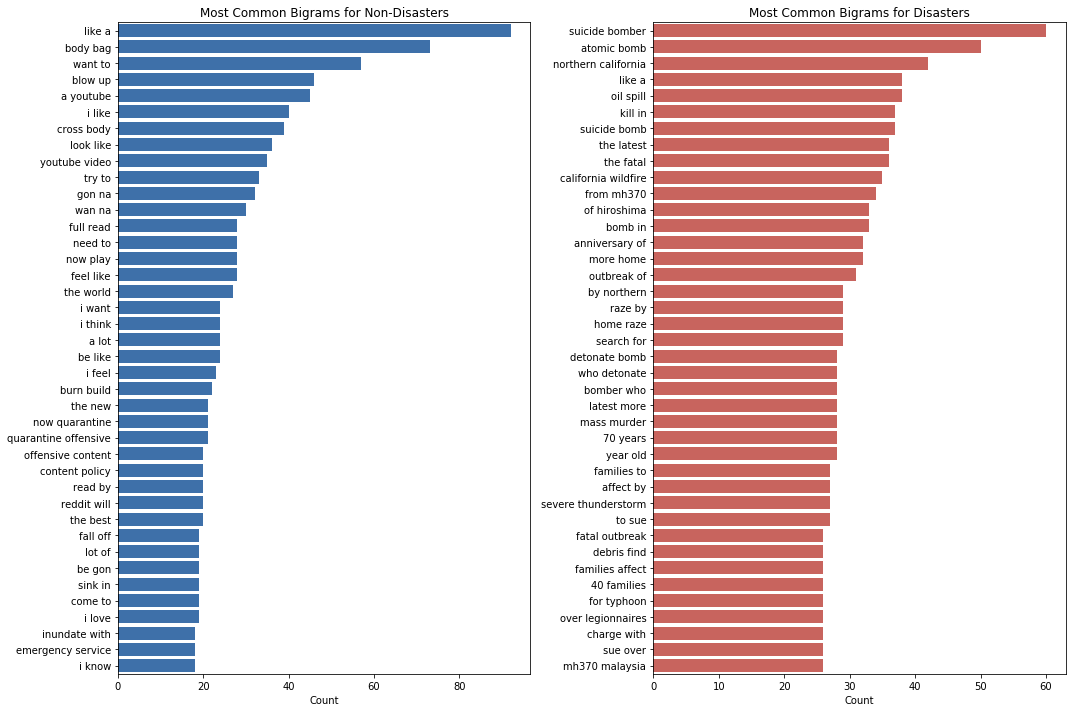

In [45]:
# Barplots for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Bigrams',data=bigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Bigrams for Non-Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Bigrams',data=bigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Bigrams for Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [46]:
# Trigrams

trigrams_disaster = tweets[tweets.target==1].text.apply(lambda x: generate_ngrams(x, 3))
trigrams_ndisaster = tweets[tweets.target==0].text.apply(lambda x: generate_ngrams(x, 3))

trigrams_d_dict = {}
for tgs in trigrams_disaster:
    for tg in tgs:
        if tg in trigrams_d_dict:
            trigrams_d_dict[tg] += 1
        else:
            trigrams_d_dict[tg] = 1

trigrams_d_df = pd.DataFrame(trigrams_d_dict.items(), columns=['Trigrams','Count'])

trigrams_nd_dict = {}
for tgs in trigrams_ndisaster:
    for tg in tgs:
        if tg in trigrams_nd_dict:
            trigrams_nd_dict[tg] += 1
        else:
            trigrams_nd_dict[tg] = 1            

trigrams_nd_df = pd.DataFrame(trigrams_nd_dict.items(), columns=['Trigrams','Count'])

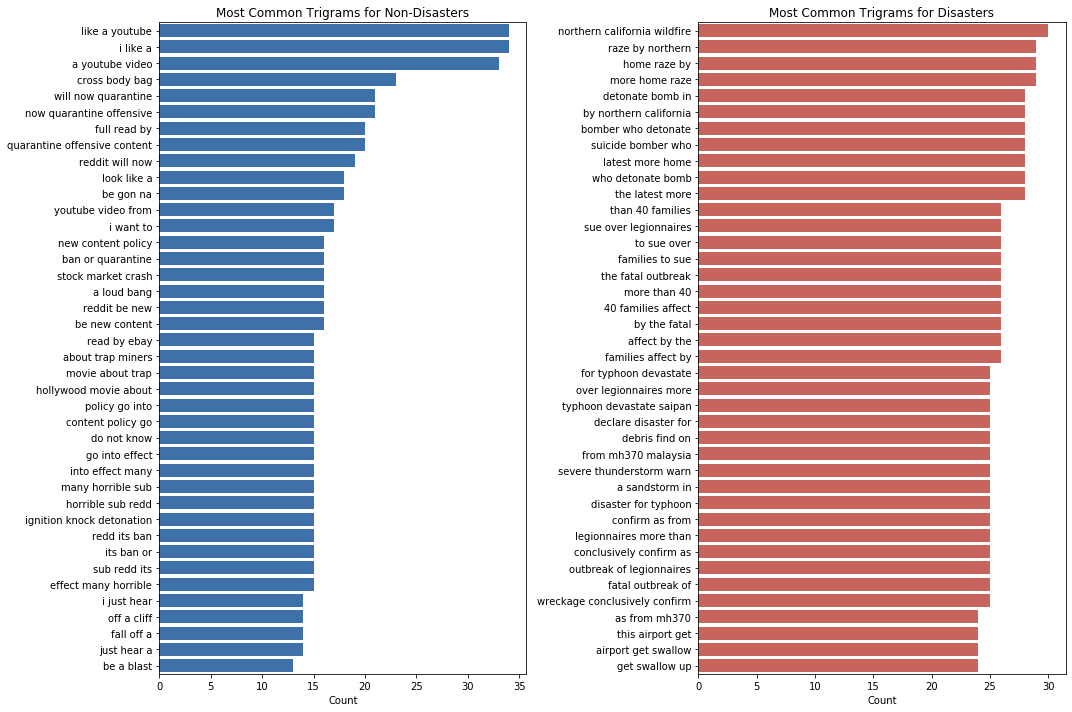

In [47]:
# Barplots for trigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Trigrams',data=trigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Trigrams for Non-Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Trigrams',data=trigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Trigrams for Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [48]:
## Remove Stopwords
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    return ' '.join([w.lower() for w in word_tokens if not w.lower() in stop])

#tweets_tmp = tweets.copy()
tweets['text_nostopwords'] = tweets.text.apply(lambda x: remove_stopwords(x))

In [49]:
from sklearn.model_selection import train_test_split
from keras.datasets import imdb
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2)
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of Val data:", X_val.shape)

# truncate and pad input sequences
max_review_length = 52
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
X_val = sequence.pad_sequences(X_val,maxlen=max_review_length)

Shape of train data: (20000,)
Shape of Test data: (25000,)
Shape of Val data: (5000,)


NameError: name 'sequence' is not defined

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(tweets.drop(['id','keyword','location','target'],axis=1), tweets[['target']], test_size=0.2, stratify=tweets[['target']], random_state=0)
#X_train_text = X_train['text']
#X_val_text = X_val['text']

#print('X_train shape: ', X_train.shape)
#print('X_val shape: ', X_val.shape)
#print('y_train shape: ', y_train.shape)
#print('y_val shape: ', y_val.shape)

In [ ]:
print('Train Class Proportion:\n',int(np.round(y_train['target'].value_counts() / len(y_train) * 100),0)
print('\nValidation Class Proportion:\n',int(np.round(y_val['target'].value_counts() / len(y_val) * 100),0)

SyntaxError: invalid syntax (<ipython-input-22-906c63763cdb>, line 2)

In [ ]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\snehal\anaconda3\lib\site-packages (2.7.0)

  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


In [ ]:
pip install keras


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: keras in c:\users\snehal\anaconda3\lib\site-packages (2.7.0)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer_1 = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer_1.fit_on_texts(X_train_text)

NameError: name 'X_train_text' is not defined

In [ ]:
X_train_text = tokenizer_1.texts_to_sequences(X_train_text)
X_val_text = tokenizer_1.texts_to_sequences(X_val_text)
print(X_train_text[:10])
print('')
print(X_val_text[:10])

NameError: name 'X_train_text' is not defined

In [ ]:
tokenizer_1.sequences_to_texts([X_train_text[1]])

In [ ]:
print('Train Set Max Length:', max(len(text) for text in X_train_text))
maxlen = 50

X_train_text = pad_sequences(X_train_text, padding='post', maxlen=maxlen)
X_val_text = pad_sequences(X_val_text, padding='post', maxlen=maxlen)

print('X_train shape:', X_train_text.shape)
print('X_train shape:', X_val_text.shape)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer_1.word_index) + 1

# load the whole embedding into memory
embeddings_index = dict()
f = open('C:/Users/Snehal/Downloads/twitter_dataset/glove.twitter.27B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

In [ ]:
# create a weight matrix for words in training set

EMBEDDING_DIM = 100 
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer_1.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print('Embedding Matrix Shape:', embedding_matrix.shape)

In [ ]:
MAX_NB_WORDS = 5000 ## Considering top 5000 most repeated words
MAX_SEQUENCE_LENGTH = 52 ## Highest number of words in a sentence 
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
embedding_layer = Embedding(len(tokenizer_1.word_index) + 1, 
                            EMBEDDING_DIM,
                            weights=[embedding_matrix], 
                            input_length=MAX_SEQUENCE_LENGTH)

In [ ]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

model = Sequential()
model.add(embedding_layer) 
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='causal'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2)) 
model.add(tf.keras.layers.Dropout(0.7)) 
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(EMBEDDING_DIM)))  
model.add(tf.keras.layers.Dense(1)) 
model.compile(loss='mean_squared_error',
              optimizer='adam') 
print(model.summary())



model.fit(X_train, y_train, validation_data=(X_val, y_val),
          epochs=2, batch_size=1)

In [ ]:
predicted = model.predict(X_test) 
default_error = math.sqrt(mean_squared_error(y_test, predicted))*100

In [ ]:
x_axis = ["Default","Removing the Dropout"]
error_list = [default_error]

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='causal'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2)) 
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(EMBEDDING_DIM))) 
model.add(tf.keras.layers.Dense(1)) 
model.compile(loss='mean_squared_error',
              optimizer='adam') 
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename="model.png")

In [ ]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5, batch_size=1)
predicted = model.predict(x_test)
error = math.sqrt(mean_squared_error(y_test, predicted))*100
error_list.append(error)